<a href="https://colab.research.google.com/github/guips02/Python-e-Mercado-Financeiro/blob/main/02_PL_HISTORICO_%24MGLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###CONFIGURAÇÕES INICIAIS

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=425c5a1499e3e939890c30dd448b4a2f71ab67e6112618d81f32098e748d6b04
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [50]:
import pandas as pd
import wget
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab.data_table import DataTable

In [4]:
#Acessando a base de dados e criando arquivos históricos:
url_base = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/'

In [5]:
#Lista com o nome de todos os arquivos:
arquivos_zip=[]
for ano in range(2010,2023):
  arquivos_zip.append(f'dfp_cia_aberta_{ano}.zip')
arquivos_zip

['dfp_cia_aberta_2010.zip',
 'dfp_cia_aberta_2011.zip',
 'dfp_cia_aberta_2012.zip',
 'dfp_cia_aberta_2013.zip',
 'dfp_cia_aberta_2014.zip',
 'dfp_cia_aberta_2015.zip',
 'dfp_cia_aberta_2016.zip',
 'dfp_cia_aberta_2017.zip',
 'dfp_cia_aberta_2018.zip',
 'dfp_cia_aberta_2019.zip',
 'dfp_cia_aberta_2020.zip',
 'dfp_cia_aberta_2021.zip',
 'dfp_cia_aberta_2022.zip']

In [6]:
#Download de todos os arquivos:
for arq in arquivos_zip:
  wget.download(url_base+arq)

In [7]:
#Extraindo os zips:
for arq in arquivos_zip:
  ZipFile(arq, 'r').extractall('CVM')

In [11]:
#Criando arquivos históricos:
!mkdir DADOS

In [10]:
nomes = ['BPA_con', 'BPA_ind', 'BPP_con', 'BPP_ind', 'DFC_MD_con', 'DFC_MD_ind', 'DFC_MI_con', 'DFC_MI_ind', 'DMPL_con', 'DMPL_ind', 'DRE_con', 'DRE_ind', 'DVA_con', 'DVA_ind']
for nome in nomes:
  arquivo = pd.DataFrame()
  for ano in range(2010,2023):
    arquivo = pd.concat([arquivo, pd.read_csv(f'CVM/dfp_cia_aberta_{nome}_{ano}.csv', sep = ';', decimal = ',', encoding = 'ISO-8859-1')])
  arquivo.to_csv(f'/content/CVM/DADOS/dfp_cia_aberta_{nome}_2010-2022.csv', index = False)

In [ ]:
dre = pd.read_csv('/content/CVM/DADOS/dfp_cia_aberta_DRE_con_2010-2022.csv')
dre = dre[dre['ORDEM_EXERC']== "ÚLTIMO"]
dre.head(3)

In [ ]:
empresas = dre[['DENOM_CIA', 'CD_CVM']].drop_duplicates().set_index('CD_CVM')
DataTable(empresas)

In [ ]:
empresa = dre[dre['CD_CVM']==22470]
empresa.head(20)

In [ ]:
#lista com o nome de todas as contas do balanço/dre/dfc/dva/dmpl:
DataTable(empresa[['CD_CONTA', 'DS_CONTA']].drop_duplicates().set_index('CD_CONTA'))

In [ ]:
conta = empresa[empresa['CD_CONTA'] == '3.99.01.01']
conta.index = pd.to_datetime(conta['DT_REFER'])
conta.head()

In [ ]:
#Calculando o P/E (P/L):
!pip install yfinance
import yfinance as yf

In [ ]:
prices = yf.download('MGLU3.SA', start = '2010-01-01')['Adj Close']
prices.head()

In [34]:
indicadores = prices.join(conta['VL_CONTA'], how='outer')

In [ ]:
#mudar nome da coluna:
indicadores.rename({'VL_CONTA':'LPA'}, axis = 1, inplace = True)
indicadores.head()

In [ ]:
indicadores.fillna(method='ffill', inplace = True)
indicadores.dropna(inplace=True)
indicadores

Text(0, 0.5, 'P/L')

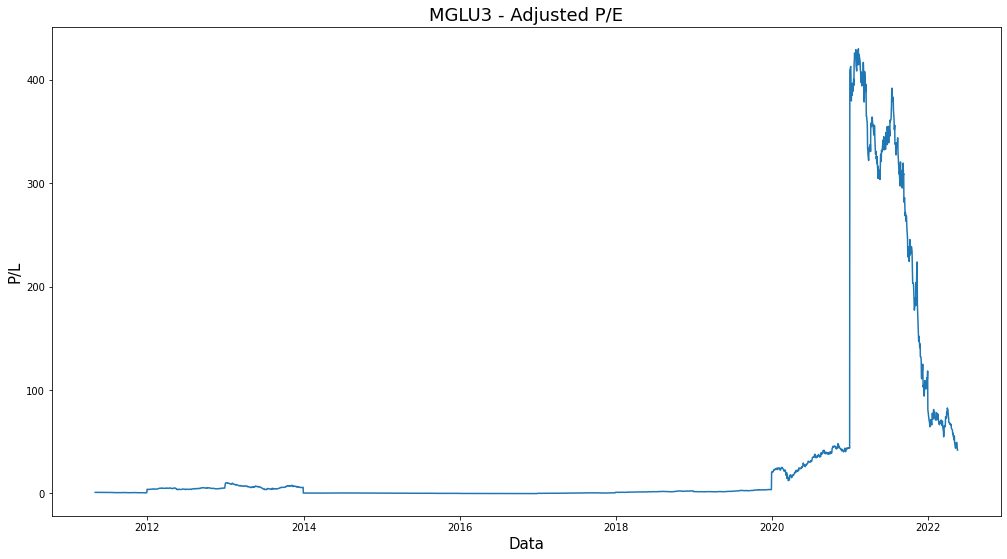

In [56]:
#Calculando P/L e plotando:
indicadores['P/L AJUSTADO'] = indicadores['Adj Close'] / indicadores['LPA']
plt.figure(figsize=(17,9),facecolor=('white'))
plt.plot(indicadores['P/L AJUSTADO'])
plt.title('MGLU3 - Adjusted P/E', fontsize = 18)
plt.xlabel('Data', fontsize = 15)
plt.ylabel('P/L', fontsize = 15)